## Requirements

requirements.txt:

* networkx 3.1
* numpy 1.24.3
* matplotlib 3.7.2

Python version: 3.10.12. time and random are already built-in in the Python interpreter.

pip version: 23.2.1

In [2]:
import networkx
import time
import random
import numpy as np

In [3]:
# For random reproducibility
random.seed(10)

def connected_components(edges):
    G = networkx.Graph()
    G.add_edges_from(edges)
    Components = list(networkx.connected_components(G))
    return Components, len(Components)
if __name__ == "__main__":
    n = 7
    prob = 0.10
    V = list(range(1,n+1))
    E = [(i,j) for i in V for j in V if i < j and random.random() < prob]
    print("vertices:", V)
    print("edges:", E)
    # (not required) graph as adjacency list:
    graph = {i: [j for j in V if j != i and (i,j) in E or (j,i) in E] for i in V}
    print("graph as adjacency list:", graph)
    start = time.process_time()
    print("number of connected components:", connected_components(E))
    end = time.process_time()
    print(f"CPU time used: {end - start} seconds")

vertices: [1, 2, 3, 4, 5, 6, 7]
edges: [(3, 6)]
graph as adjacency list: {1: [], 2: [], 3: [6], 4: [], 5: [], 6: [3], 7: []}
number of connected components: ([{3, 6}], 1)
CPU time used: 0.0001497980000000343 seconds


## Time complexity

* Graph is written as an adjacency list
    * For each node, you can find its neighbours by traversing its adjacency list once (linear time) $\rightarrow \mathcal{O}(V)$
    * Each edge can appear twice, once for each vertex $\rightarrow \mathcal{O}(E)$

* In average case, the given graph is moderately sparse. So, O(|E|) = O(|V|). Therefore, O(|V| + |E|) = O(|V| + |V|) = O(|V|)

* In worst case, given graph is dense. So, O(|E|) = O(|$V^2$|). Therefore, O(|V| + |E|) = O(|V| + |$V^2$|) = O(|$V^2$|)

____

## Implementação de raiz

In [5]:
def alternative_dfs(V, E, node=0, visited=None, stack=None):
    if visited is None:
        visited = set()
    if stack is None:
        stack = []

    visited.add(node)

    for edge in E:
        if (edge[0] == node) and (edge[1] not in visited) and (edge[1] not in stack):
            stack.append(edge[1])
        elif (edge[1] == node) and (edge[0] not in visited) and (edge[0] not in stack):
            stack.append(edge[0])

    if stack:
        next_node = stack.pop()
        return alternative_dfs(V, E, next_node, visited, stack)

    #return (node, list(visited), stack)
    return list(visited)


def alternative_connected(V,E):
    '''
    Code is built for graphs with integer nodes from 0 to n
    '''
    component_count = 0
    connected_components = []
    visited = [False for v in range(len(V))]

    for v in V:
        if visited[v]==False:
            connected=alternative_dfs(V,E,node=v) #find connected component starting from this node
            for el in connected:
                visited[el]=True
            if len(connected) > 1: #not considering isolated nodes
                connected_components.append(connected)
                component_count += 1
    return connected_components, component_count

# Example usage:
V = [0,1,2,3,4,5]
E = [(0,1),(0,2),(0,3),(2,3),(2,4)]

print(alternative_dfs(V,E,node=2))
print(alternative_connected(V,E))

[0, 1, 2, 3, 4]
([[0, 1, 2, 3, 4]], 1)


____

## Outra solução

Solução por base https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/, mas sem ser de programação orientada a objetos.

In [6]:
#Auxiliary functions

def adjacency(V, E):
    adjacency_list = {vertex: [] for vertex in V}

    for edge in E:
        u, v = edge  # Assuming each edge is a tuple (u, v)
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)  # For undirected graphs, add the reverse edge as well

    return adjacency_list

def dfs(adj, node=0, visited=[], component=[]):
    visited[node] = True
    component.append(node)

    for neighbor in adj[node]:
        if visited[neighbor]==False:
            dfs(adj, neighbor, visited, component)

def connected_components_util(adj):
    num_vertices = len(adj)
    visited = [False for i in range(num_vertices)]
    components = []

    for node in range(num_vertices):
        if visited[node]==False:
            component = []
            dfs(adj, node, visited, component)
            if len(component) > 1: #discards isolated nodes, same interpretation as the networkx solution
                components.append(component)

    return components

#####
#################
#####

#Aggregate into 1 function
def third_connected_components(V,E):
    adjacency_list = adjacency(V,E)
    components = connected_components_util(adjacency_list)
    return components, len(components)

In [7]:
#Example of usage

V = [0,1,2,3,4,5]
E = [(0,1),(0,2),(0,3),(2,3),(2,4)]

adj = adjacency(V, E)
print(adj)

result = third_connected_components(V,E)
print(result)

{0: [1, 2, 3], 1: [0], 2: [0, 3, 4], 3: [0, 2], 4: [2], 5: []}
([[0, 1, 2, 3, 4]], 1)


___

# Tests

In [8]:
# For random reproducibility
random.seed(10)

def checker(tries=60,prob=0.1):
    '''
    Checks if answer from connected_components() and my_connected_components() are the same
    '''
    ns = list(range(1,tries+1))
    for n in ns:
        V = list(range(n))
        E = [(i,j) for i in V for j in V if i < j and random.random() < prob]
        graph = {i: [j for j in V if j != i and (i,j) in E or (j,i) in E] for i in V}
        
        results1 = connected_components(E)
        results2 = alternative_connected(V,E)
        results3 = third_connected_components(V,E)

        if (results1[1] != results2[1]) or (results1[1] != results3[1]) or (results2[1] != results3[1]):
            print("Failed!")
            print("Graph: ", graph)
            print("Results1: ", results1)
            print("Results2: ", results2)
            print("Results2: ", results3)
    print("All answers equal")

In [9]:
checker(50,prob=1)

All answers equal


In [10]:
def tester(starting_size=1, ending_size=50, steps=1,prob=0.1):
    ns = list(range(starting_size,ending_size,steps))
    results1 = []
    results2 = []
    results3 = []
    for n in ns:
        V = list(range(n))
        E = [(i,j) for i in V for j in V if i < j and random.random() < prob]
        graph = {i: [j for j in V if j != i and (i,j) in E or (j,i) in E] for i in V}
        step1=[]
        step2=[]
        step3=[]
        for i in range(3):
            start = time.process_time()
            running1 = connected_components(E)
            end = time.process_time()
            step1.append(end-start)

            start = time.process_time()
            running2 = alternative_connected(V,E)
            end = time.process_time()
            step2.append(end-start)

            start = time.process_time()
            running3 = third_connected_components(V,E)
            end = time.process_time()
            step3.append(end-start)
            
        results1.append(np.mean(step1))
        results2.append(np.mean(step2))
        results3.append(np.mean(step3))
    return ns, results1, results2, results3

In [11]:
# For random reproducibility
random.seed(10)

tester(1,10,2)

([1, 3, 5, 7, 9],
 [2.5395333333270525e-05,
  1.9106000000101986e-05,
  1.3356666666612208e-05,
  6.787966666665923e-05,
  4.1019999999984215e-05],
 [1.1048333333318894e-05,
  1.311433333336017e-05,
  1.4732666666628091e-05,
  2.786933333331909e-05,
  3.0224999999939328e-05],
 [1.0086666666649554e-05,
  1.258666666670294e-05,
  1.2702999999965789e-05,
  1.802099999996069e-05,
  1.969466666669935e-05])

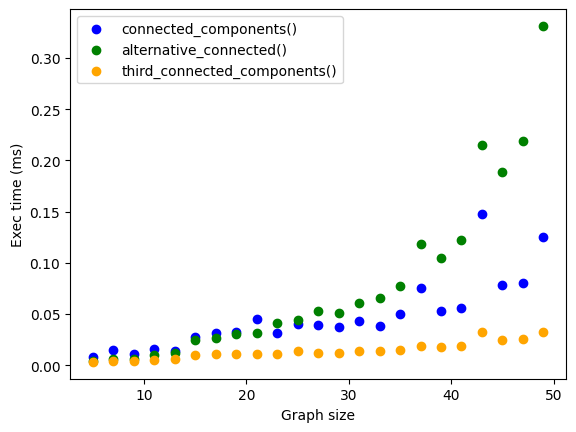

In [12]:
import matplotlib.pyplot as plt

# For random reproducibility
random.seed(10)

ns, results1, results2, results3 = tester(5,50,2)
plt.scatter(ns, np.array(results1)*1000, color="blue", label="connected_components()")
plt.scatter(ns, np.array(results2)*1000, color="green", label="alternative_connected()")
plt.scatter(ns, np.array(results3)*1000, color="orange", label="third_connected_components()")
plt.xlabel("Graph size")
plt.ylabel("Exec time (ms)")
plt.legend()
plt.show()

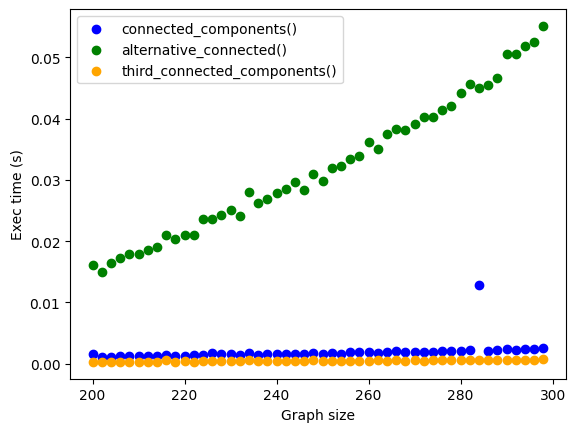

In [13]:
import matplotlib.pyplot as plt

# For random reproducibility
random.seed(10)

ns, results1, results2, results3 = tester(200,300,2)
plt.scatter(ns, results1, color="blue", label="connected_components()")
plt.scatter(ns, results2, color="green", label="alternative_connected()")
plt.scatter(ns, results3, color="orange", label="third_connected_components()")
plt.xlabel("Graph size")
plt.ylabel("Exec time (s)")
plt.legend()
plt.show()

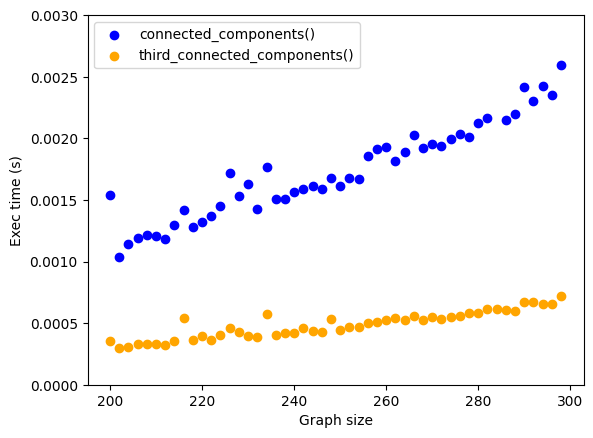

In [14]:
plt.scatter(ns, results1, color="blue", label="connected_components()")
plt.scatter(ns, results3, color="orange", label="third_connected_components()")
plt.xlabel("Graph size")
plt.ylabel("Exec time (s)")
plt.ylim(0,0.003)
plt.legend()
plt.show()